# Árvore de Decisão | Haberman

In [1]:
import numpy as np
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
raw_data = urllib.request.urlopen(url)

In [3]:
dataset = np.loadtxt(raw_data, delimiter=",")

In [4]:
print(dataset.shape)

(306, 4)


In [5]:
X = dataset[:,0:2]
y = dataset[:,3]

In [6]:
# Holdout 70% treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0) 

In [7]:
# Declara o Classificador
clfa = KNeighborsClassifier(n_neighbors=3)

In [20]:
# Treina o Classificador
clfa = clfa.fit(X_train, y_train)

In [9]:
# Imprime os resultados do experimento baseado em holdout
predicted=clfa.predict(X_test)

In [10]:
# calcula a acuracia na base de teste (taxa de acerto)
score=clfa.score(X_test, y_test)

In [12]:
# calcula a matriz de confusao
matrix = metrics.confusion_matrix(y_test, predicted)

In [13]:
#F1 Score
from sklearn.metrics import f1_score
f1=f1_score(y_test, predicted, zero_division=1)

In [14]:
#calculo da curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=1)
roc_auc=metrics.auc(fpr, tpr)

## Curva ROC

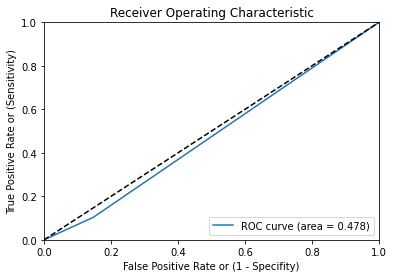

In [15]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");

## Resultados baseados em Holdout 70/30

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         1.0       0.64      0.90      0.75        58
         2.0       0.45      0.15      0.22        34

    accuracy                           0.62        92
   macro avg       0.55      0.52      0.49        92
weighted avg       0.57      0.62      0.55        92



In [19]:
print("Taxa de acerto = %.2f \n" % score)
print("F1 Score (Positive Class) = %.2f \n" % f1)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
specificity = tn / (tn+fp)
print("Specificity = %.2f \n" % specificity)
print("Matriz de confusao:")
print(matrix)

Taxa de acerto = 0.62 

F1 Score (Positive Class) = 0.75 

Specificity = 0.90 

Matriz de confusao:
[[52  6]
 [29  5]]
